In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("insurance_part2_data-2.csv")

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [9]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [11]:
df.shape

(3000, 10)

In [12]:
# Are there any missing values ?
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [13]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [14]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [16]:
for column in df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 
                   'Duration', 'Sales', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
3     239
1     472
0     924
2    1365
Name: Agency_Code, dtype: int64


TYPE :  2
0    1163
1    1837
Name: Type, dtype: int64


CLAIMED :  2
1     924
0    2076
Name: Claimed, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
0      46
1    2954
Name: Channel, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
11      81
10      81
6       81
5       82
8       83
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
252.85     60
22.00      79
10.00     163
20.00  

In [17]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,0,0,1,15.0,1,27,60.0,0,0
329,36,2,1,0,0.0,1,5,20.0,2,0
407,36,2,1,0,0.0,1,11,19.0,1,0
411,35,2,1,0,0.0,1,2,20.0,2,0
422,36,2,1,0,0.0,1,5,20.0,2,0
...,...,...,...,...,...,...,...,...,...,...
2940,36,2,1,0,0.0,1,8,10.0,1,0
2947,36,2,1,0,0.0,1,10,28.0,2,0
2952,36,2,1,0,0.0,1,2,10.0,1,0
2962,36,2,1,0,0.0,1,4,20.0,2,0


In [18]:
df.drop_duplicates(inplace=True) 

In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


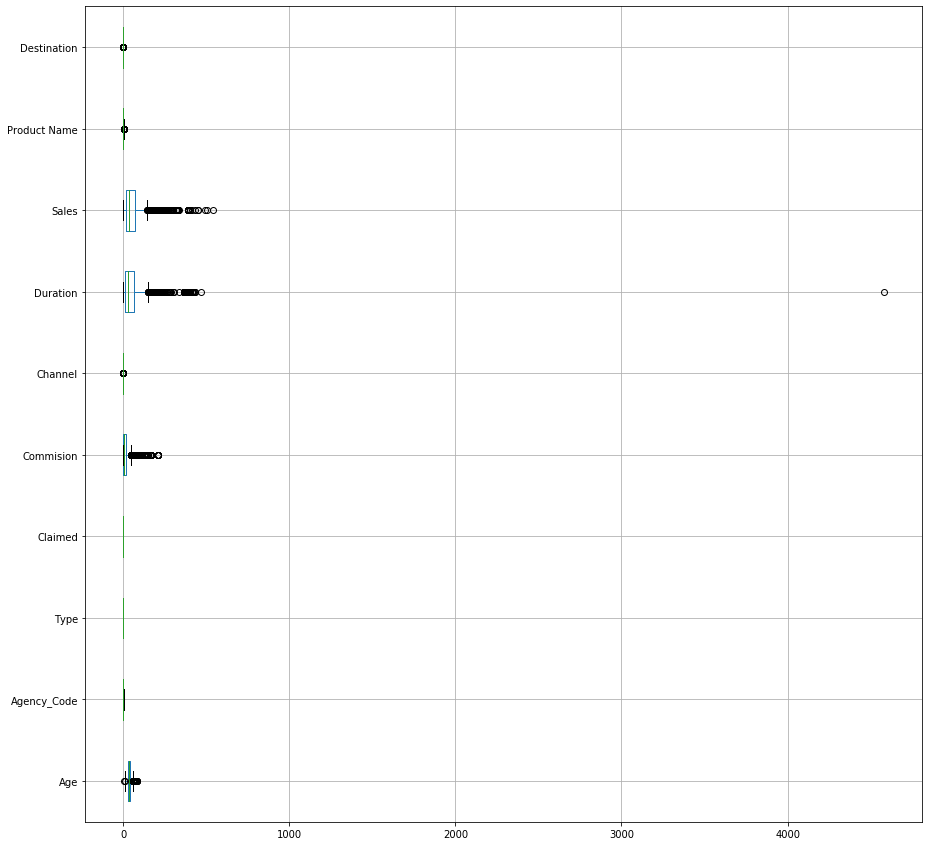

In [20]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration','Sales','Product Name','Destination']].boxplot(vert=0)

There are outliers in all the variables. CART and Random Forest are robust to outliers. Neural Networks can handle outliers if there are more hidden layers and if the number of outliers is lesser. For now, we will keep the data as it is, and if we find the performance of the neural network to be lesser, then we will treat the outliers and re-build neural network model

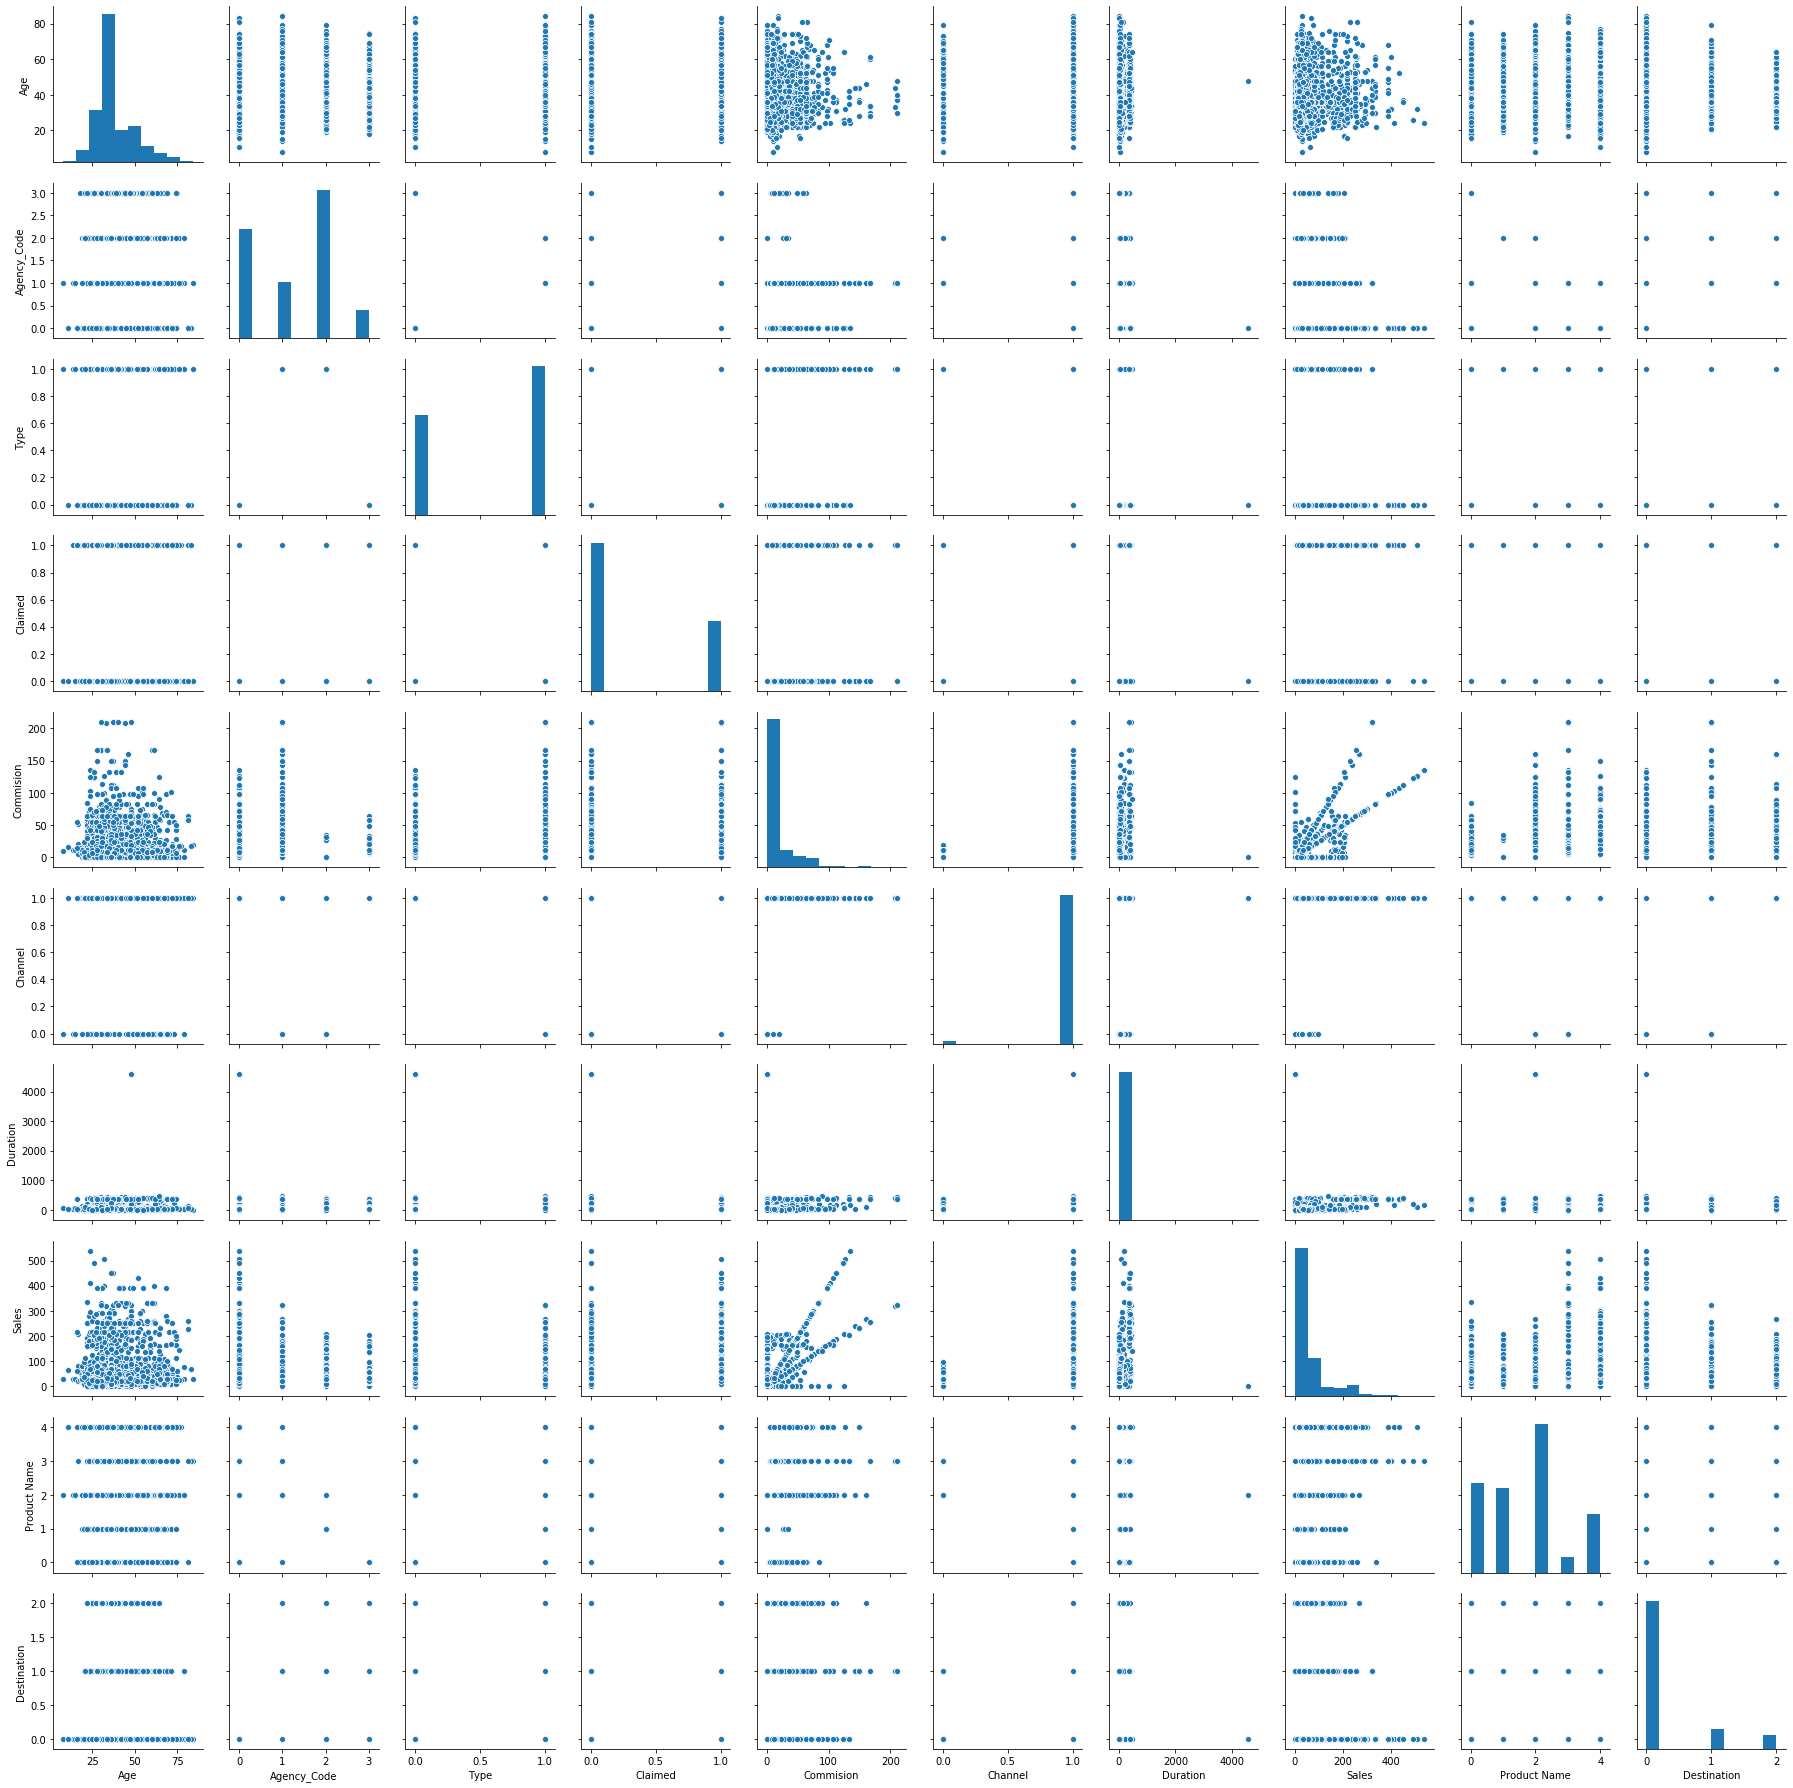

In [21]:
sns.pairplot(df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration','Sales','Product Name','Destination']])

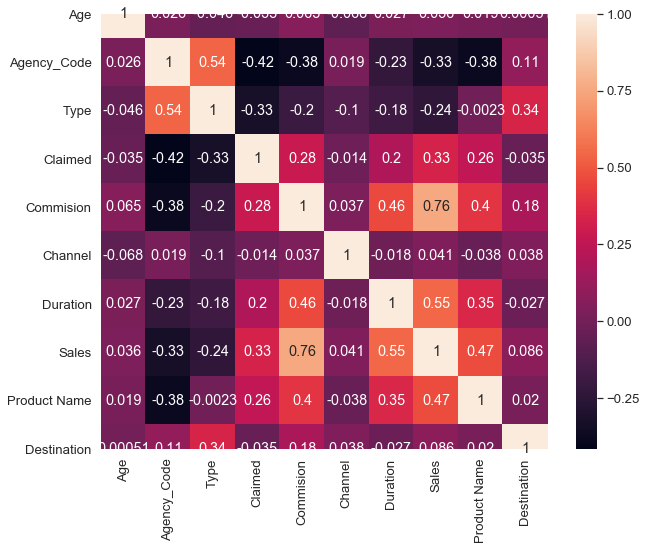

In [22]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration','Sales','Product Name','Destination']].corr(), annot=True)

There are mostly positive correlations between variables, and very few negative correlations.
Overall the magnitude of correlations between the variables are very less.

In [25]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [ ]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")



In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [28]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [29]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10], #20,30,50
    'min_samples_leaf': [50], #100,150
    'min_samples_split': [450], #150,300
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [30]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=450,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [32]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.619073
Sales         0.314424
Product Name  0.048825
Commision     0.015189
Duration      0.002489
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [33]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [34]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.714744,0.285256
4,0.714744,0.285256


AUC: 0.803


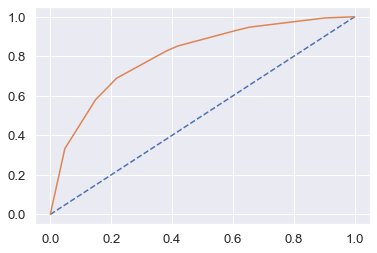

In [35]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.796


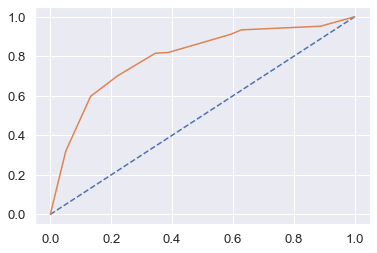

In [36]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [37]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [38]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [39]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [40]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.58
cart_train_recall  0.61
cart_train_f1  0.65


In [41]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [42]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [43]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [44]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.6
cart_train_recall  0.63
cart_train_f1  0.68


In [65]:
param_grid = {
    'max_depth': [10,14,18],
    'max_features': [6,8,10],
    'min_samples_leaf': [10, 14, 18],
    'min_samples_split': [50,60,70],
    'n_estimators': [300,400,500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, train_labels)

In [ ]:
grid_search.best_params_

In [48]:
best_grid = grid_search.best_estimator_

In [49]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [51]:
confusion_matrix(train_labels,ytrain_predict)

array([[1225,  134],
       [ 257,  386]], dtype=int64)

In [52]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8046953046953047

In [53]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.74      0.60      0.66       643

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



In [54]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.6
rf_train_recall  0.66
rf_train_f1  0.74


Area under Curve is 0.7508545644096096


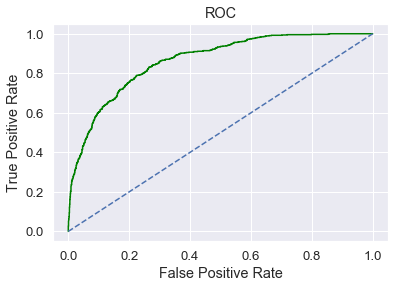

In [55]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [56]:
confusion_matrix(test_labels,ytest_predict)

array([[520,  68],
       [116, 155]], dtype=int64)

In [57]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7857974388824214

In [58]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.70      0.57      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [59]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.57
rf_test_recall  0.63
rf_test_f1  0.7


Area under Curve is 0.728154730526897


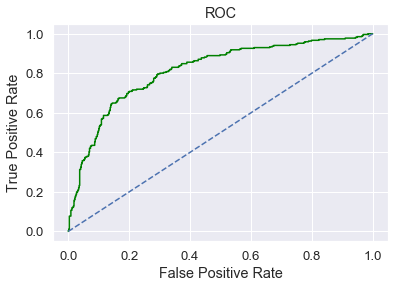

In [60]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [62]:
#Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.326242
Sales         0.208897
Product Name  0.181819
Duration      0.100600
Commision     0.088882
Age           0.068889
Destination   0.014890
Type          0.008343
Channel       0.001438


In [68]:
param_grid = {
    'hidden_layer_sizes': [100], #,50,200
    'max_iter': [7000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [69]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [70]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=7000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

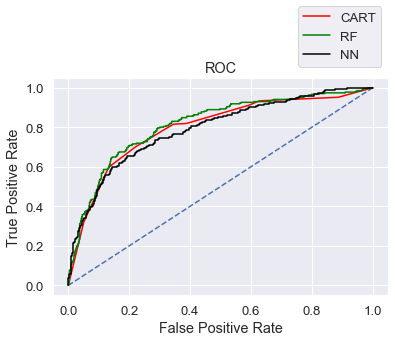

In [95]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

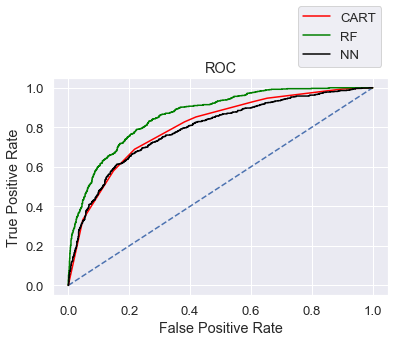

In [96]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [97]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.80,0.79,0.77,0.77
AUC,0.80,0.80,0.75,0.73,0.72,0.72
Recall,0.61,0.63,0.66,0.63,0.62,0.61
Precision,0.58,0.60,0.60,0.57,0.58,0.57
F1 Score,0.65,0.68,0.74,0.70,0.66,0.66
